In [58]:
import numpy as np
import imageio as im
import glob, sys, os, random
import matplotlib.pyplot as plt

## READ the Data
- Normalized
- One_hot encoded
- Flat
- Split in Validation, Training and Testing DataSet

In [88]:
# import MNIST data
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
notMNIST = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


## PRINT OUT SHAPES

In the preprocessing phase 20,000 samples from each "Alphabet" class were selected and were converted to MNIST FORMAT.
Using the builtin routine of MNIST we can see it has already made validation dataset of 5000 samples.
#### NOTE: Here the dataset is notMNIST

In [89]:
print("Shape of train dataset", notMNIST.train.images.shape)
print("Shape of test dataset", notMNIST.test.images.shape)
print("Shape of validation dataset", notMNIST.validation.images.shape)
print("Shape of validation dataset", notMNIST.validation.images.shape)
print("Shape of train labels", notMNIST.train.labels.shape)
print("Shape of test labels", notMNIST.test.labels.shape)

Shape of train dataset (195000, 784)
Shape of test dataset (10100, 784)
Shape of validation dataset (5000, 784)
Shape of validation dataset (5000, 784)
Shape of train labels (195000, 10)
Shape of test labels (10100, 10)


## Check if dataset is correctly read by matching images and labels

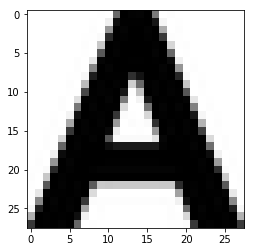

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.00784314 0.         0.6666667
  1.         0.98823535 0.9843138  1.         0.59607846 0.
  0.01176471 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00784314 0.         0.1254902  0.95294124
  0.9960785  0.9960785  0.9960785  1.         0.92549026 0.08235294
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.01568628 0.         0.49803925 1.
  0.9843138  1.         1.         0.98823535 1.         0.43137258
  0.         0.01568628 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.00392157 0.03921569 0.

In [90]:
sample_img = notMNIST.train.images[5].reshape(28, 28)
plt.imshow(sample_img).set_cmap('Greys')
plt.show()
print(sample_img)

In [91]:
sample_label = notMNIST.train.labels[5]
sample_label

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

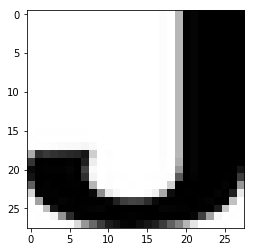

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.01960784
  0.         0.3921569  1.         0.9803922  1.         1.
  1.         1.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.01960784
  0.         0.3921569  1.         0.9803922  1.         1.
  1.         1.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.01960784
  0.         0.3921569  1.         0.9803922  1.         1.
  1.         1.         1.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.       

In [92]:
sample_img = notMNIST.validation.images[5].reshape(28, 28)
plt.imshow(sample_img).set_cmap('Greys')
plt.show()
print(sample_img)

In [93]:
sample_label = notMNIST.validation.labels[5]
sample_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

## Setting up the Parameters

In [94]:
# Hyper Parameters / Display Parameters
learning_rate = 0.001
training_epochs = 50
batch_size = 100
display_step = 1
# validate_size = int(.10*notMNIST.train.images.shape[0])
# train_size=notMNIST.train.images.shape[0]-validate_size

# Network Parameters
hid_lay_mod = 1024 # 1st layer number of modules
input_features = 784 # notMNIST data input (img shape: 28*28)
output_classes = 10 # notMNIST total classes (A-J digits)

In [95]:
# tf Graph input
input_images = tf.placeholder("float", [None, input_features])
y = tf.placeholder("float", [None, output_classes])


# input_features x 1024 module hidden layer weights and biases
w_h_layer = tf.Variable(tf.random_normal([input_features, hid_lay_mod]))
b_h_layer = tf.Variable(tf.random_normal([hid_lay_mod]))
    
# 1024 x output_classes output layer weights and biases
w_o_layer = tf.Variable(tf.random_normal([hid_lay_mod, output_classes]))
b_o_layer = tf.Variable(tf.random_normal([output_classes]))

### Construct the Regression Model

In [96]:
# Create model
def logistic_regression_model(input_images, w_h_layer, b_h_layer,w_o_layer,b_o_layer):
    # Hidden layer with RELU activation
    layer_1 = tf.nn.relu(tf.add(tf.matmul(input_images, w_h_layer), b_h_layer))
    
    # Output layer with linear activation
    output_layer = tf.matmul(layer_1, w_o_layer) + b_o_layer
    return output_layer

In [97]:
# Construct model
prediction = logistic_regression_model(input_images, w_h_layer, b_h_layer,w_o_layer,b_o_layer)
print(prediction)

Tensor("add_5:0", shape=(?, 10), dtype=float32)


In [98]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
print(cost)
print(optimizer)

Tensor("Mean_203:0", shape=(), dtype=float32)
name: "GradientDescent_5"
op: "NoOp"
input: "^GradientDescent_5/update_Variable_24/ApplyGradientDescent"
input: "^GradientDescent_5/update_Variable_25/ApplyGradientDescent"
input: "^GradientDescent_5/update_Variable_26/ApplyGradientDescent"
input: "^GradientDescent_5/update_Variable_27/ApplyGradientDescent"



In [99]:
print(w_h_layer)

<tf.Variable 'Variable_24:0' shape=(784, 1024) dtype=float32_ref>


In [100]:
# Initializing the variables# Initia 
init = tf.global_variables_initializer()

### Starting the training in the Tensorflow session.

In [101]:
# Launch the graph
epch_cost=[]
train_acc=[]
test_acc=[]
valid_acc=[]
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(notMNIST.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
#             print(i)
            batch_x, batch_y = notMNIST.train.next_batch(batch_size)
#             
            _, c = sess.run([optimizer, cost], feed_dict={input_images: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        epch_cost.append(avg_cost)
        # Display logs per epoch step
        if epoch % display_step == 0:
#             epoch_cost[i]=avg_cost
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
            # Training model
            correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            outlabel=prediction.eval({input_images:notMNIST.train.images})
            # Training Accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            acc1= accuracy.eval({input_images:notMNIST.train.images, y:notMNIST.train.labels})
            train_acc.append(acc1)
            print("Training Accuracy:",acc1 )
            
            correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            outlabel=prediction.eval({input_images:notMNIST.validation.images})
            # Calculate accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            acc2= accuracy.eval({input_images: notMNIST.validation.images,y:notMNIST.validation.labels})
            valid_acc.append(acc2)
            print("Validation Accuracy:",acc2 )            
            
#             correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
#             outlabel=prediction.eval({input_images:notMNIST.test.images})
#             # Calculate accuracy
#             accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
#             acc3= accuracy.eval({input_images: notMNIST.test.images,y:notMNIST.test.labels})
#             test_acc.append(acc3)
#             print("Test Accuracy:",acc3 )

    print("######################################################")
    print("Optimization Finished!")
    print("######################################################")
    
    print("TEST ACCURACY AFTER OPTIMIZATION")

    # Training model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    outlabel=prediction.eval({input_images:notMNIST.train.images,y:notMNIST.train.labels})
    # Training Accuracy
    accuracy = 100*tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Training Accuracy:", accuracy.eval({input_images:notMNIST.train.images, y:notMNIST.train.labels}),"%")
    print("Validation Accuracy:", valid_acc[training_epochs-1],"%")

    # Test model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    outlabel=prediction.eval({input_images:notMNIST.test.images})
    # Calculate accuracy
    accuracy = 100*tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Test Accuracy:", accuracy.eval({input_images: notMNIST.test.images,y:notMNIST.test.labels}),"%")

Epoch: 0001 cost= 72.631502198
Training Accuracy: 0.7228
Validation Accuracy: 0.7256
Epoch: 0002 cost= 44.259148792
Training Accuracy: 0.7481641
Validation Accuracy: 0.747
Epoch: 0003 cost= 38.153873428
Training Accuracy: 0.7578205
Validation Accuracy: 0.7562
Epoch: 0004 cost= 34.366434499
Training Accuracy: 0.7659282
Validation Accuracy: 0.7606
Epoch: 0005 cost= 31.645204111
Training Accuracy: 0.7712051
Validation Accuracy: 0.7668
Epoch: 0006 cost= 29.529117235
Training Accuracy: 0.7756359
Validation Accuracy: 0.7728
Epoch: 0007 cost= 27.810647548
Training Accuracy: 0.77968204
Validation Accuracy: 0.7776
Epoch: 0008 cost= 26.359747490
Training Accuracy: 0.78264105
Validation Accuracy: 0.7816
Epoch: 0009 cost= 25.102087359
Training Accuracy: 0.7867026
Validation Accuracy: 0.7812
Epoch: 0010 cost= 24.018365697
Training Accuracy: 0.7885231
Validation Accuracy: 0.7828
Epoch: 0011 cost= 23.060459172
Training Accuracy: 0.7912308
Validation Accuracy: 0.7824
Epoch: 0012 cost= 22.174243678
Tra

### PLOTS for Visual Analysis

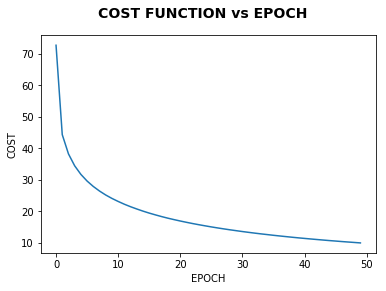

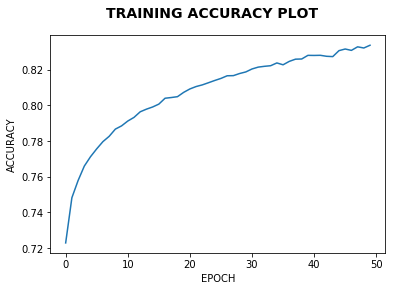

In [106]:
fig = plt.figure()
fig.suptitle('COST FUNCTION vs EPOCH', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
# ax=plt.figure()
# ax.set_title('Cost Function')
ax.set_xlabel('EPOCH')
ax.set_ylabel('COST')
ax.plot(epch_cost)

# fig, ax1=plt.subplots(epch_cost)
# # ax1.set_xlabel('$EPOCHS$')
# function1 = ax1.plot(epch_cost, 'b', label='Sine')
fig = plt.figure()
fig.suptitle('TRAINING ACCURACY PLOT', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

ax.set_xlabel('EPOCH')
ax.set_ylabel('ACCURACY')
ax.plot(train_acc, label="Tr_acc")
plt.show()


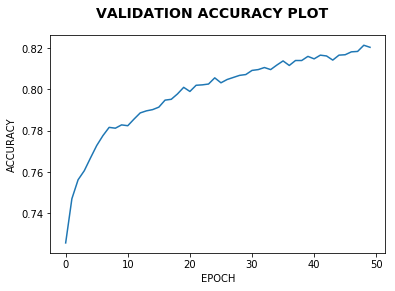

In [107]:
fig = plt.figure()
fig.suptitle('VALIDATION ACCURACY PLOT', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

ax.set_xlabel('EPOCH')
ax.set_ylabel('ACCURACY')
ax.plot(valid_acc, label="valid_acc")
# ax.plot(valid_acc, label="Val_acc")
# ax.plot(test_acc, label="Test_acc")
plt.show()